In [13]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
#load the iris dataset, it is a python dictionary
iris = datasets.load_iris()
#this converting is only for visualization purposes
iris_df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
print(iris_df.head())
print(np.unique(iris.target))
print({0: "Iris-Setosa", 1: "Iris-Versicolour", 2:"Iris-Virginica" })

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 1 2]
{0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}


In [14]:
#Task: Identify virginica from the rest based on  petal length (column 2) and petal width (column 3)
X = iris["data"][:, (2, 3)]  # petal length, petal width


y = (iris["target"] == 2).astype(np.int32) # 1 if Iris virginica, else 0
print(X.shape, y.shape)

(150, 2) (150,)


In [16]:
print(X, y)
#axis 1: rows: collapse across rows: get mean of the features

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [17]:
#Naive mean algorithm

#select the data points from the numpy matrix (y==1: it will give us the points where virginica class is held)
virginica = X[y==1]
others = X[y==0]

#calculate the mean of the virginica distribution
mean_virginica = np.mean(virginica, axis=0)
mean_others = np.mean(others, axis=0)

a = 2*(mean_virginica - mean_others)
b = np.sum(mean_others*mean_others) - np.sum(mean_virginica*mean_virginica)
print("naive decision boundary")
print("for z = w1x1 + w2x2 + b: (w1, w2) =",a)
print("for z = w1x1 + w2x2 + b: c =",b)

#w2x2  = -w1x1 -b => x1 = -w1/w2 x -b/w2

naive decision boundary
for z = w1x1 + w2x2 + b: (w1, w2) = [5.382 2.48 ]
for z = w1x1 + w2x2 + b: c = -26.126262999999994


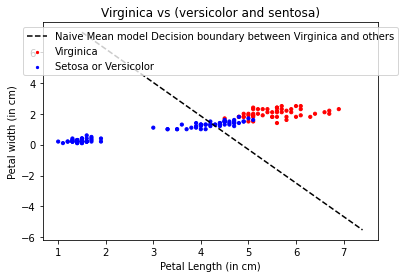

In [12]:
#a = [w1, w2]: x = [x, y]; w1.x + w2.y + b = 0 => y = -(w1/w2)x - b/w2
m =  -a[0]/a[1]
c = -b/a[1]
x_n = np.arange(np.min(X[:, 0])+0.5, np.max(X[:, 0])+0.5, 1E-3)
y_n = m*x_n + c
#generate the plot
plt.plot(x_n, y_n, color=[0,0,0], ls='--', label='Naive Mean model Decision boundary between Virginica and others')
####################################################################################################################################################

#s is the marker size array corresponding to each training example. Thus the y matrix can be used (plots only the virginica) as other radius is 0 and is ignored
#Similarly 1-y is will show the other classes, multiplied by 10 to increase visibility
plt.title("Virginica vs (versicolor and sentosa)")
plt.xlabel('Petal Length (in cm)')
plt.ylabel("Petal width (in cm)")
plt.scatter(X[:, 0], X[:,1], s=10*y, marker='o', color = 'r', label = 'Virginica')
plt.scatter(X[:, 0], X[:,1], s=10*(1-y), marker='o', color = 'b', label = 'Setosa or Versicolor')
plt.legend(loc='upper center')
plt.show()
#####################################################################################################################################################